In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../../../data/taxi-allocation.csv')

In [3]:
df

,date,day_of_week,part_of_day,num_of_rides,segment
0,2013-07-01,Monday,afternoon,1687,Monday_afternoon
1,2013-07-01,Monday,evening,889,Monday_evening
2,2013-07-01,Monday,morning,1696,Monday_morning
3,2013-07-01,Monday,night,462,Monday_night
4,2013-07-02,Tuesday,afternoon,1675,Tuesday_afternoon
...,...,...,...,...,...
1455,2014-06-29,Sunday,night,1687,Sunday_night
1456,2014-06-30,Monday,afternoon,1732,Monday_afternoon
1457,2014-06-30,Monday,evening,1009,Monday_evening
1458,2014-06-30,Monday,morning,1591,Monday_morning


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df

,date,day_of_week,part_of_day,num_of_rides,segment
0,2013-07-01,Monday,afternoon,1687,Monday_afternoon
1,2013-07-01,Monday,evening,889,Monday_evening
2,2013-07-01,Monday,morning,1696,Monday_morning
3,2013-07-01,Monday,night,462,Monday_night
4,2013-07-02,Tuesday,afternoon,1675,Tuesday_afternoon
...,...,...,...,...,...
1455,2014-06-29,Sunday,night,1687,Sunday_night
1456,2014-06-30,Monday,afternoon,1732,Monday_afternoon
1457,2014-06-30,Monday,evening,1009,Monday_evening
1458,2014-06-30,Monday,morning,1591,Monday_morning


In [6]:
time_map = {
    'night': (5, 59),
    'morning': (11, 59),
    'afternoon': (17, 59),
    'evening': (23, 59)
}

In [7]:
def add_time(row):
    h, m = time_map[row['part_of_day']]
    return row['date'] + pd.Timedelta(hours=h, minutes=m)

In [8]:
df['datetime'] = df.apply(add_time, axis=1)

In [9]:
df

,date,day_of_week,part_of_day,num_of_rides,segment,datetime
0,2013-07-01,Monday,afternoon,1687,Monday_afternoon,2013-07-01 17:59:00
1,2013-07-01,Monday,evening,889,Monday_evening,2013-07-01 23:59:00
2,2013-07-01,Monday,morning,1696,Monday_morning,2013-07-01 11:59:00
3,2013-07-01,Monday,night,462,Monday_night,2013-07-01 05:59:00
4,2013-07-02,Tuesday,afternoon,1675,Tuesday_afternoon,2013-07-02 17:59:00
...,...,...,...,...,...,...
1455,2014-06-29,Sunday,night,1687,Sunday_night,2014-06-29 05:59:00
1456,2014-06-30,Monday,afternoon,1732,Monday_afternoon,2014-06-30 17:59:00
1457,2014-06-30,Monday,evening,1009,Monday_evening,2014-06-30 23:59:00
1458,2014-06-30,Monday,morning,1591,Monday_morning,2014-06-30 11:59:00


In [10]:
df['unique_id'] = "id"

In [11]:
df = df.rename(columns={'datetime': 'ds', "num_of_rides": "y"})

In [12]:
df

,date,day_of_week,part_of_day,y,segment,ds,unique_id
0,2013-07-01,Monday,afternoon,1687,Monday_afternoon,2013-07-01 17:59:00,id
1,2013-07-01,Monday,evening,889,Monday_evening,2013-07-01 23:59:00,id
2,2013-07-01,Monday,morning,1696,Monday_morning,2013-07-01 11:59:00,id
3,2013-07-01,Monday,night,462,Monday_night,2013-07-01 05:59:00,id
4,2013-07-02,Tuesday,afternoon,1675,Tuesday_afternoon,2013-07-02 17:59:00,id
...,...,...,...,...,...,...,...
1455,2014-06-29,Sunday,night,1687,Sunday_night,2014-06-29 05:59:00,id
1456,2014-06-30,Monday,afternoon,1732,Monday_afternoon,2014-06-30 17:59:00,id
1457,2014-06-30,Monday,evening,1009,Monday_evening,2014-06-30 23:59:00,id
1458,2014-06-30,Monday,morning,1591,Monday_morning,2014-06-30 11:59:00,id


In [13]:
df = df.sort_values(by=['ds']).reset_index(drop=True)

In [14]:
split_index = int(len(df) * 0.8)
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df['y'] = scaler.fit_transform(train_df[['y']])

C:\Users\Nikola\AppData\Local\Temp\ipykernel_16300\153694787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df[['y']])


In [16]:
train_df

,date,day_of_week,part_of_day,y,segment,ds,unique_id
0,2013-07-01,Monday,night,0.078119,Monday_night,2013-07-01 05:59:00,id
1,2013-07-01,Monday,morning,0.514316,Monday_morning,2013-07-01 11:59:00,id
2,2013-07-01,Monday,afternoon,0.511135,Monday_afternoon,2013-07-01 17:59:00,id
3,2013-07-01,Monday,evening,0.229056,Monday_evening,2013-07-01 23:59:00,id
4,2013-07-02,Tuesday,night,0.109579,Tuesday_night,2013-07-02 05:59:00,id
...,...,...,...,...,...,...,...
1163,2014-04-17,Thursday,evening,0.447154,Thursday_evening,2014-04-17 23:59:00,id
1164,2014-04-18,Friday,night,0.495581,Friday_night,2014-04-18 05:59:00,id
1165,2014-04-18,Friday,morning,0.275009,Friday_morning,2014-04-18 11:59:00,id
1166,2014-04-18,Friday,afternoon,0.273595,Friday_afternoon,2014-04-18 17:59:00,id


In [17]:
test_df

,date,day_of_week,part_of_day,y,segment,ds,unique_id
1168,2014-04-19,Saturday,night,1313,Saturday_night,2014-04-19 05:59:00,id
1169,2014-04-19,Saturday,morning,877,Saturday_morning,2014-04-19 11:59:00,id
1170,2014-04-19,Saturday,afternoon,1000,Saturday_afternoon,2014-04-19 17:59:00,id
1171,2014-04-19,Saturday,evening,1171,Saturday_evening,2014-04-19 23:59:00,id
1172,2014-04-20,Sunday,night,1328,Sunday_night,2014-04-20 05:59:00,id
...,...,...,...,...,...,...,...
1455,2014-06-29,Sunday,evening,772,Sunday_evening,2014-06-29 23:59:00,id
1456,2014-06-30,Monday,night,394,Monday_night,2014-06-30 05:59:00,id
1457,2014-06-30,Monday,morning,1591,Monday_morning,2014-06-30 11:59:00,id
1458,2014-06-30,Monday,afternoon,1732,Monday_afternoon,2014-06-30 17:59:00,id


In [18]:
import timesfm

tfm = timesfm.TimesFm(
    hparams=timesfm.TimesFmHparams(
        backend="gpu",
        per_core_batch_size=32,
        horizon_len=28,
        num_layers=50,
        use_positional_embedding=False,
        context_len=64,
    ),
    checkpoint=timesfm.TimesFmCheckpoint(
        huggingface_repo_id="google/timesfm-2.0-500m-pytorch"),
)

 See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded PyTorch TimesFM, likely because python version is 3.11.13 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:03:15) [MSC v.1929 64 bit (AMD64)].


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

In [19]:
forecast = tfm.forecast_on_df(
    inputs=train_df,
    freq="6h",
    value_name="y",
    num_jobs=-1,
)

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.


In [20]:
columns = ['timesfm', 'timesfm-q-0.1', 'timesfm-q-0.2', 'timesfm-q-0.3', 'timesfm-q-0.4', 'timesfm-q-0.5', 'timesfm-q-0.6', 'timesfm-q-0.7', 'timesfm-q-0.8', 'timesfm-q-0.9']

In [21]:
for column in columns:
    forecast[column] = scaler.inverse_transform(forecast[[column]])

In [22]:
forecast

,unique_id,ds,timesfm,timesfm-q-0.1,timesfm-q-0.2,timesfm-q-0.3,timesfm-q-0.4,timesfm-q-0.5,timesfm-q-0.6,timesfm-q-0.7,timesfm-q-0.8,timesfm-q-0.9
0,id,2014-04-19 05:59:00,1470.330200,984.801575,1154.239502,1274.206055,1377.305908,1470.330200,1562.535400,1662.796753,1777.026489,1940.259644
1,id,2014-04-19 11:59:00,1360.191772,867.298340,1037.440430,1160.691650,1263.914429,1360.191772,1456.367920,1559.218262,1681.157715,1853.200806
2,id,2014-04-19 17:59:00,1212.460571,715.151550,886.524719,1010.749573,1114.191650,1212.460571,1309.462891,1410.867676,1533.786743,1706.181152
3,id,2014-04-19 23:59:00,1047.326538,532.034180,711.747192,838.863098,944.475952,1047.326538,1144.844238,1251.191895,1377.228394,1556.811157
4,id,2014-04-20 05:59:00,971.025208,434.100769,623.052185,754.787964,863.849854,971.025208,1075.840576,1185.491577,1317.019165,1503.356689
5,id,2014-04-20 11:59:00,1359.882690,840.925964,1019.893372,1149.199341,1257.106934,1359.882690,1461.007812,1570.325806,1700.092285,1885.799438
6,id,2014-04-20 17:59:00,1419.557495,894.663635,1077.334595,1206.897583,1317.295044,1419.557495,1522.105347,1632.716553,1765.842163,1953.758423
7,id,2014-04-20 23:59:00,1038.843262,495.625763,682.916199,815.275513,930.730103,1038.843262,1146.889893,1262.937866,1400.449463,1597.367065
8,id,2014-04-21 05:59:00,935.102295,373.452576,570.542053,705.943665,822.631042,935.102295,1043.472900,1158.315674,1297.542969,1492.945557
9,id,2014-04-21 11:59:00,1164.548462,616.731323,810.249878,944.129211,1058.341064,1164.548462,1268.785400,1383.896362,1517.634155,1711.597046


In [23]:
result = test_df.merge(forecast, how='left', on=['unique_id', 'ds'])

In [24]:
pred_cols = [col for col in result.columns if col.startswith("timesfm")]
df_clean = result.dropna(subset=pred_cols).reset_index(drop=True)

In [25]:
quantiles = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [26]:
import numpy as np

def quantile_loss(y_true, y_pred, q):
    e = y_true - y_pred
    return np.mean(np.maximum(q * e, (q-1) * e))

In [27]:
for q in quantiles:
    col = f"timesfm-q-{q}"
    loss = quantile_loss(df_clean['y'], df_clean[col], q)
    print(f"Quantile loss q={q}: {loss:.3f}")

Quantile loss q=0.1: 63.280
Quantile loss q=0.2: 115.440
Quantile loss q=0.3: 147.686
Quantile loss q=0.4: 170.157
Quantile loss q=0.5: 173.425
Quantile loss q=0.6: 164.568
Quantile loss q=0.7: 145.764
Quantile loss q=0.8: 117.618
Quantile loss q=0.9: 68.804


In [28]:
df_clean

,date,day_of_week,part_of_day,y,segment,ds,unique_id,timesfm,timesfm-q-0.1,timesfm-q-0.2,timesfm-q-0.3,timesfm-q-0.4,timesfm-q-0.5,timesfm-q-0.6,timesfm-q-0.7,timesfm-q-0.8,timesfm-q-0.9
0,2014-04-19,Saturday,night,1313,Saturday_night,2014-04-19 05:59:00,id,1470.330200,984.801575,1154.239502,1274.206055,1377.305908,1470.330200,1562.535400,1662.796753,1777.026489,1940.259644
1,2014-04-19,Saturday,morning,877,Saturday_morning,2014-04-19 11:59:00,id,1360.191772,867.298340,1037.440430,1160.691650,1263.914429,1360.191772,1456.367920,1559.218262,1681.157715,1853.200806
2,2014-04-19,Saturday,afternoon,1000,Saturday_afternoon,2014-04-19 17:59:00,id,1212.460571,715.151550,886.524719,1010.749573,1114.191650,1212.460571,1309.462891,1410.867676,1533.786743,1706.181152
3,2014-04-19,Saturday,evening,1171,Saturday_evening,2014-04-19 23:59:00,id,1047.326538,532.034180,711.747192,838.863098,944.475952,1047.326538,1144.844238,1251.191895,1377.228394,1556.811157
4,2014-04-20,Sunday,night,1328,Sunday_night,2014-04-20 05:59:00,id,971.025208,434.100769,623.052185,754.787964,863.849854,971.025208,1075.840576,1185.491577,1317.019165,1503.356689
5,2014-04-20,Sunday,morning,781,Sunday_morning,2014-04-20 11:59:00,id,1359.882690,840.925964,1019.893372,1149.199341,1257.106934,1359.882690,1461.007812,1570.325806,1700.092285,1885.799438
6,2014-04-20,Sunday,afternoon,788,Sunday_afternoon,2014-04-20 17:59:00,id,1419.557495,894.663635,1077.334595,1206.897583,1317.295044,1419.557495,1522.105347,1632.716553,1765.842163,1953.758423
7,2014-04-20,Sunday,evening,856,Sunday_evening,2014-04-20 23:59:00,id,1038.843262,495.625763,682.916199,815.275513,930.730103,1038.843262,1146.889893,1262.937866,1400.449463,1597.367065
8,2014-04-21,Monday,night,307,Monday_night,2014-04-21 05:59:00,id,935.102295,373.452576,570.542053,705.943665,822.631042,935.102295,1043.472900,1158.315674,1297.542969,1492.945557
9,2014-04-21,Monday,morning,1153,Monday_morning,2014-04-21 11:59:00,id,1164.548462,616.731323,810.249878,944.129211,1058.341064,1164.548462,1268.785400,1383.896362,1517.634155,1711.597046


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_true = df_clean['y']
y_pred = df_clean['timesfm']

mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 346.85052490234375
RMSE: 167703.40625


In [30]:
lower = df_clean['timesfm-q-0.1']
upper = df_clean['timesfm-q-0.9']
coverage = ((df_clean['y'] >= lower) & (df_clean['y'] <= upper)).mean()
print("Coverage (10%-90% interval):", coverage)

Coverage (10%-90% interval): 0.6785714285714286


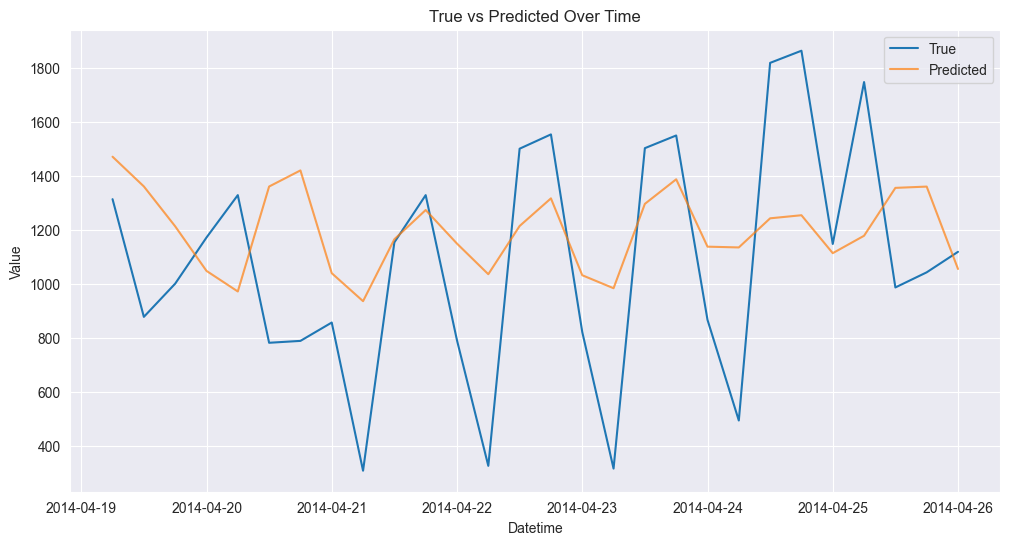

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_clean['ds'], df_clean['y'], label='True')
plt.plot(df_clean['ds'], df_clean['timesfm'], label='Predicted', alpha=0.7)
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('True vs Predicted Over Time')
plt.legend()
plt.show()

In [35]:
from os import path
from typing import Optional, Tuple

import joblib
import numpy as np
import pandas as pd
import torch
from finetuning.finetuning_torch import FinetuningConfig, TimesFMFinetuner
from huggingface_hub import snapshot_download
from torch.utils.data import Dataset

from timesfm import TimesFm, TimesFmCheckpoint, TimesFmHparams
from timesfm.pytorch_patched_decoder import PatchedTimeSeriesDecoder

from sklearn.preprocessing import MinMaxScaler

class TimeSeriesDataset(Dataset):
  """Dataset for time series data compatible with TimesFM."""

  def __init__(self,
               series: np.ndarray,
               context_length: int,
               horizon_length: int,
               freq_type: int = 0):
    """
        Initialize dataset.

        Args:
            series: Time series data
            context_length: Number of past timesteps to use as input
            horizon_length: Number of future timesteps to predict
            freq_type: Frequency type (0, 1, or 2)
        """
    if freq_type not in [0, 1, 2]:
      raise ValueError("freq_type must be 0, 1, or 2")

    self.series = series
    self.context_length = context_length
    self.horizon_length = horizon_length
    self.freq_type = freq_type
    self._prepare_samples()

  def _prepare_samples(self) -> None:
    """Prepare sliding window samples from the time series."""
    self.samples = []
    total_length = self.context_length + self.horizon_length

    for start_idx in range(0, len(self.series) - total_length + 1):
      end_idx = start_idx + self.context_length
      x_context = self.series[start_idx:end_idx]
      x_future = self.series[end_idx:end_idx + self.horizon_length]
      self.samples.append((x_context, x_future))

  def __len__(self) -> int:
    return len(self.samples)

  def __getitem__(
      self, index: int
  ) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor, torch.Tensor]:
    x_context, x_future = self.samples[index]

    x_context = torch.tensor(x_context, dtype=torch.float32)
    x_future = torch.tensor(x_future, dtype=torch.float32)

    input_padding = torch.zeros_like(x_context)
    freq = torch.tensor([self.freq_type], dtype=torch.long)

    return x_context, input_padding, freq, x_future

def prepare_datasets(series: np.ndarray,
                     context_length: int,
                     horizon_length: int,
                     freq_type: int = 0,
                     train_split: float = 0.8) -> Tuple[Dataset, Dataset]:
  """
    Prepare training and validation datasets from time series data.

    Args:
        series: Input time series data
        context_length: Number of past timesteps to use
        horizon_length: Number of future timesteps to predict
        freq_type: Frequency type (0, 1, or 2)
        train_split: Fraction of data to use for training

    Returns:
        Tuple of (train_dataset, val_dataset)
    """
  train_size = int(len(series) * train_split)
  train_data = series[:train_size]
  val_data = series[train_size:]

  # Create datasets with specified frequency type
  train_dataset = TimeSeriesDataset(train_data,
                                    context_length=context_length,
                                    horizon_length=horizon_length,
                                    freq_type=freq_type)

  val_dataset = TimeSeriesDataset(val_data,
                                  context_length=context_length,
                                  horizon_length=horizon_length,
                                  freq_type=freq_type)

  return train_dataset, val_dataset


In [36]:
def get_model(load_weights: bool = False):
  device = "cuda" if torch.cuda.is_available() else "cpu"
  repo_id = "google/timesfm-2.0-500m-pytorch"
  hparams = TimesFmHparams(
      backend=device,
      per_core_batch_size=32,
      horizon_len=28,
      num_layers=50,
      use_positional_embedding=False,
      context_len=
      64,  # Context length can be anything up to 2048 in multiples of 32
  )
  tfm = TimesFm(hparams=hparams,
                checkpoint=TimesFmCheckpoint(huggingface_repo_id=repo_id))

  model = PatchedTimeSeriesDecoder(tfm._model_config)
  if load_weights:
    checkpoint_path = path.join(snapshot_download(repo_id), "torch_model.ckpt")
    loaded_checkpoint = torch.load(checkpoint_path, weights_only=True)
    model.load_state_dict(loaded_checkpoint)
  return model, hparams, tfm._model_config


In [37]:
def plot_predictions(
    model: TimesFm,
    val_dataset: Dataset,
) -> None:
  """
    Plot model predictions against ground truth for a batch of validation data.

    Args:
      model: Trained TimesFM model
      val_dataset: Validation dataset
    """
  import matplotlib.pyplot as plt

  model.eval()

  x_context, x_padding, freq, x_future = val_dataset[0]
  x_context = x_context.unsqueeze(0)  # Add batch dimension
  x_padding = x_padding.unsqueeze(0)
  freq = freq.unsqueeze(0)
  x_future = x_future.unsqueeze(0)

  device = next(model.parameters()).device
  x_context = x_context.to(device)
  x_padding = x_padding.to(device)
  freq = freq.to(device)
  x_future = x_future.to(device)

  with torch.no_grad():
    predictions = model(x_context, x_padding.float(), freq)
    predictions_mean = predictions[..., 0]  # [B, N, horizon_len]
    last_patch_pred = predictions_mean[:, -1, :]  # [B, horizon_len]

  context_vals = x_context[0].cpu().numpy()
  future_vals = x_future[0].cpu().numpy()
  pred_vals = last_patch_pred[0].cpu().numpy()

  context_len = len(context_vals)
  horizon_len = len(future_vals)

  plt.figure(figsize=(12, 6))

  plt.plot(range(context_len),
           context_vals,
           label="Historical Data",
           color="blue",
           linewidth=2)

  plt.plot(
      range(context_len, context_len + horizon_len),
      future_vals,
      label="Ground Truth",
      color="green",
      linestyle="--",
      linewidth=2,
  )

  plt.plot(range(context_len, context_len + horizon_len),
           pred_vals,
           label="Prediction",
           color="red",
           linewidth=2)

  plt.xlabel("Time Step")
  plt.ylabel("Value")
  plt.title("TimesFM Predictions vs Ground Truth")
  plt.legend()
  plt.grid(True)
  plt.show()

In [38]:
import os, json, torch

def save_finetuned_timesfm(model, hparams, save_dir="my_finetuned_timesfm"):
    os.makedirs(save_dir, exist_ok=True)

    # 1. Save weights
    torch.save(model.state_dict(), os.path.join(save_dir, "pytorch_model.bin"))

    # 2. Save config (minimal example — adjust if you added custom settings)
    config = {
        "backend": hparams.backend,
        "per_core_batch_size": hparams.per_core_batch_size,
        "horizon_len": hparams.horizon_len,
        "num_layers": hparams.num_layers,
        "use_positional_embedding": hparams.use_positional_embedding,
        "context_len": hparams.context_len,
    }
    with open(os.path.join(save_dir, "config.json"), "w") as f:
        json.dump(config, f, indent=2)

    print(f"✅ Saved fine-tuned TimesFM to {save_dir}")

In [39]:
df

,date,day_of_week,part_of_day,y,segment,ds,unique_id
0,2013-07-01,Monday,night,462,Monday_night,2013-07-01 05:59:00,id
1,2013-07-01,Monday,morning,1696,Monday_morning,2013-07-01 11:59:00,id
2,2013-07-01,Monday,afternoon,1687,Monday_afternoon,2013-07-01 17:59:00,id
3,2013-07-01,Monday,evening,889,Monday_evening,2013-07-01 23:59:00,id
4,2013-07-02,Tuesday,night,551,Tuesday_night,2013-07-02 05:59:00,id
...,...,...,...,...,...,...,...
1455,2014-06-29,Sunday,evening,772,Sunday_evening,2014-06-29 23:59:00,id
1456,2014-06-30,Monday,night,394,Monday_night,2014-06-30 05:59:00,id
1457,2014-06-30,Monday,morning,1591,Monday_morning,2014-06-30 11:59:00,id
1458,2014-06-30,Monday,afternoon,1732,Monday_afternoon,2014-06-30 17:59:00,id


In [40]:
def get_data(context_len: int,
             horizon_len: int,
             freq_type: int = 0) -> Tuple[Dataset, Dataset]:
    time_series = df['y'].values

    train_dataset, val_dataset = prepare_datasets(
        series=time_series,
        context_length=context_len,
        horizon_length=horizon_len,
        freq_type=freq_type,
        train_split=0.8,
    )

    print(f"Created datasets:")
    print(f"- Training samples: {len(train_dataset)}")
    print(f"- Validation samples: {len(val_dataset)}")
    print(f"- Using frequency type: {freq_type}")
    return train_dataset, val_dataset


def single_gpu_example():
    """Basic example of finetuning TimesFM on stock data."""
    model, hparams, tfm_config = get_model(load_weights=True)
    config = FinetuningConfig(batch_size=256,
                              num_epochs=5,
                              learning_rate=1e-4,
                              use_wandb=False,
                              freq_type=1,
                              log_every_n_steps=10,
                              val_check_interval=0.5,
                              use_quantile_loss=True)

    train_dataset, val_dataset= get_data(128,
                                             tfm_config.horizon_len,
                                             freq_type=config.freq_type)
    finetuner = TimesFMFinetuner(model, config)

    print("\nStarting finetuning...")
    results = finetuner.finetune(train_dataset=train_dataset,
                                 val_dataset=val_dataset)

    print("\nFinetuning completed!")
    print(f"Training history: {len(results['history']['train_loss'])} epochs")
    print(results)

    plot_predictions(
        model=model,
        val_dataset=val_dataset,
    )

    torch.save(model.state_dict(), f"timesfm_predictions_allocation.ckpt")

In [41]:
single_gpu_example()

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Created datasets:
- Training samples: 913
- Validation samples: 37
- Using frequency type: 1

Starting finetuning...


RuntimeError: [enforce fail at alloc_cpu.cpp:116] data. DefaultCPUAllocator: not enough memory: you tried to allocate 262144 bytes.